In [105]:
# This is learning time-series data 
# one stock analysis - outcome should be comparable. 

In [106]:
# libraries 

from getData import get_data, get_ohlcv
from technical_indicator import LR, MACD, RSI, BB, ATR, ADX, RENKO, anomaly, historical_volatility, get_support_resistance_levels, VWAP
from Returns import cummulative_returns, CAGR, volatility, SHARPE, SORTINO, MAXDROWDOWN, CALMAR

import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import copy

%load_ext autoreload
%autoreload 2
pd.set_option('mode.chained_assignment', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting Data

In [107]:

tickers = ['ASIANPAINT.NS']
tickers

# ['RELIANCE.NS'
# ,
           
#            'TCS.NS', 'HDFCBANK.NS', 'BHARTIARTL.NS', 'ICICIBANK.NS', 'INFY.NS', 'SBIN.NS', 'HINDUNILVR.NS', 
#            'BAJFINANCE.NS',
#            'ITC.NS']
# '^NSEI', 

['ASIANPAINT.NS']

In [108]:
# Store data in dictionary
ohlcv_dict = {}
for stock in tickers:
    ohlcv_dict[stock] = get_ohlcv(ticker=stock, period = '5y', interval='1d', multi_level_index=False)
    # ohlcv_dict[stock] = ohlcv_dict[stock].between_time('09:35', '16:00')

[*********************100%***********************]  1 of 1 completed


In [109]:
data = copy.deepcopy(ohlcv_dict)

## Analysis

In [110]:
data

{'ASIANPAINT.NS':                   Close         High          Low         Open   Volume
 Date                                                                   
 2020-06-04  1576.864014  1659.724756  1570.349044  1656.684413  4388930
 2020-06-05  1581.496704  1601.572390  1564.557738  1592.547975  2884206
 2020-06-08  1577.346436  1607.990920  1572.279237  1599.304295  2046505
 2020-06-09  1584.874878  1635.981144  1579.759374  1582.896211  3671930
 2020-06-10  1578.987183  1616.774027  1571.217549  1590.617656  2069280
 ...                 ...          ...          ...          ...      ...
 2025-05-29  2294.300049  2309.000000  2286.500000  2303.199951  1414643
 2025-05-30  2259.100098  2304.000000  2255.000000  2296.500000  3610431
 2025-06-02  2266.699951  2272.300049  2257.899902  2259.100098   702789
 2025-06-03  2255.699951  2287.300049  2246.699951  2272.600098   792587
 2025-06-04  2249.000000  2261.000000  2240.899902  2249.500000   768079
 
 [1240 rows x 5 columns]}

# cummulative Return

In [111]:

# def VWAP(data):
#     # Step 1: Calculate Typical Price (Series)
#     data['TP'] = (data['High'] + data['Low'] + data['Close']) / 3
    
#     # Step 2: Cumulative volume and cumulative price*volume
#     data['cum_vol'] = data['Volume'].cumsum()
#     data['cum_pv'] = (data['TP'] * data['Volume']).cumsum()
#     # data['cum_pv'] = np.multiply(data['TP'].values, data['Volume'].values).cumsum()
#     # Step 3: VWAP
#     data['VWAP'] = data['cum_pv'] / data['cum_vol']
#     return data['VWAP']

In [112]:
# def get_support_resistance_levels(data, order=14):
#     # Local minima as support
#     support_idx = argrelextrema(data['Low'].values, np.less_equal, order=order)[0]
#     support_levels = data['Low'].iloc[support_idx]

#     # Local maxima as resistance
#     resistance_idx = argrelextrema(data['High'].values, np.greater_equal, order=order)[0]
#     resistance_levels = data['High'].iloc[resistance_idx]

#     return support_levels, resistance_levels

In [113]:
# def historical_volatility(data, window=20):
#     # Rolling standard deviation
#     volatility = data['Log_Return'].rolling(window).std() * np.sqrt(252)  # annualized
#     data['volatility'] = volatility
#     return data['volatility']

In [114]:
def signal_logic(row):
    if (row['RSI'] < 30 and
        row['Close'] < row['LB'] and
        row['ATR'] > row['d_rtn'] and
        row['Volume'] > row['VWAP']):
        return 1  # Buy
    elif (row['RSI'] > 70 and
          row['Close'] > row['UB']):
        return -1  # Sell
    else:
        return 0  # Hold




In [115]:
for stock_name in tickers:
    cummulative_returns(data[stock_name])
    ATR(data[stock_name])
    anomaly(data[stock_name])
    support, resistnace  = get_support_resistance_levels(data[stock_name])
    data[stock_name]['support'] = support
    data[stock_name]['resistance'] = resistnace
    historical_volatility(data[stock_name])
    historical_volatility(data[stock_name])
    RSI(data[stock_name])
    VWAP(data[stock_name])
    BB(data[stock_name])
    print('--')

--


In [116]:
for stock_name in tickers:
    data[stock_name]['Signal'] = data[stock_name].apply(signal_logic, axis=1)

In [117]:
data

{'ASIANPAINT.NS':                   Close         High          Low         Open   Volume  \
 Date                                                                      
 2020-06-04  1576.864014  1659.724756  1570.349044  1656.684413  4388930   
 2020-06-05  1581.496704  1601.572390  1564.557738  1592.547975  2884206   
 2020-06-08  1577.346436  1607.990920  1572.279237  1599.304295  2046505   
 2020-06-09  1584.874878  1635.981144  1579.759374  1582.896211  3671930   
 2020-06-10  1578.987183  1616.774027  1571.217549  1590.617656  2069280   
 ...                 ...          ...          ...          ...      ...   
 2025-05-29  2294.300049  2309.000000  2286.500000  2303.199951  1414643   
 2025-05-30  2259.100098  2304.000000  2255.000000  2296.500000  3610431   
 2025-06-02  2266.699951  2272.300049  2257.899902  2259.100098   702789   
 2025-06-03  2255.699951  2287.300049  2246.699951  2272.600098   792587   
 2025-06-04  2249.000000  2261.000000  2240.899902  2249.500000   76807

In [120]:
df = data['ASIANPAINT.NS']
df

,Close,High,Low,Open,Volume,d_rtn,cum_rtn,r_mean,r_std2+,r_std2-,...,TP,cum_vol,cum_pv,VWAP,MB,STD,UB,LB,WIDTH,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-04,1576.864014,1659.724756,1570.349044,1656.684413,4388930,NaN,NaN,NaN,NaN,NaN,...,1602.312604,4388930,7.032438e+09,1602.312604,NaN,NaN,NaN,NaN,NaN,0
2020-06-05,1581.496704,1601.572390,1564.557738,1592.547975,2884206,0.002938,1.002938,NaN,NaN,NaN,...,1582.542277,7273136,1.159682e+10,1594.472562,NaN,NaN,NaN,NaN,NaN,0
2020-06-08,1577.346436,1607.990920,1572.279237,1599.304295,2046505,-0.002624,1.000306,NaN,NaN,NaN,...,1585.872198,9319641,1.484231e+10,1592.584003,NaN,NaN,NaN,NaN,NaN,0
2020-06-09,1584.874878,1635.981144,1579.759374,1582.896211,3671930,0.004773,1.005080,NaN,NaN,NaN,...,1600.205132,12991571,2.071815e+10,1594.738035,NaN,NaN,NaN,NaN,NaN,0
2020-06-10,1578.987183,1616.774027,1571.217549,1590.617656,2069280,-0.003715,1.001346,NaN,NaN,NaN,...,1588.992920,15060851,2.400622e+10,1593.948687,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-29,2294.300049,2309.000000,2286.500000,2303.199951,1414643,-0.003864,1.454976,1.503772,1.629309,1.378234,...,2296.600016,1742584806,4.617266e+12,2649.665212,2318.085711,21.097339,2360.280389,2275.891032,84.389357,0
2025-05-30,2259.100098,2304.000000,2255.000000,2296.500000,3610431,-0.015342,1.432654,1.499527,1.626730,1.372324,...,2272.700033,1746195237,4.625472e+12,2648.885799,2311.135725,23.247828,2357.631381,2264.640069,92.991312,0
2025-06-02,2266.699951,2272.300049,2257.899902,2259.100098,702789,0.003364,1.437473,1.495274,1.621266,1.369282,...,2265.633301,1746898026,4.627064e+12,2648.731614,2307.000000,25.523450,2358.046899,2255.953101,102.093798,0


In [121]:
df.loc[df['Signal']==-1]

,Close,High,Low,Open,Volume,d_rtn,cum_rtn,r_mean,r_std2+,r_std2-,...,TP,cum_vol,cum_pv,VWAP,MB,STD,UB,LB,WIDTH,Signal
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-24,1686.411865,1750.596377,1625.364190,1625.364190,11545923,0.037621,1.069472,NaN,NaN,NaN,...,1687.457478,44379612,7.139127e+10,1608.650262,1581.355390,35.887607,1653.130603,1509.580177,143.550426,-1
2020-08-18,1810.446411,1820.010182,1768.810321,1768.810321,2586298,0.020363,1.148131,1.067408,1.159194,0.975622,...,1799.755638,130528846,2.159923e+11,1654.747752,1712.190404,48.703173,1809.596749,1614.784058,194.812691,-1
2020-08-21,1891.496826,1906.228862,1816.870611,1823.777786,5688228,0.044322,1.199531,1.079990,1.207076,0.952903,...,1871.532100,139703067,2.329681e+11,1667.595002,1750.435059,64.745468,1879.925994,1620.944123,258.981871,-1
2020-12-03,2333.053711,2343.164380,2240.995221,2263.973586,4334658,0.041259,1.479553,1.344880,1.456753,1.233007,...,2305.737771,323891561,6.061713e+11,1871.525549,2139.064192,66.086640,2271.237471,2006.890912,264.346558,-1
2020-12-04,2359.514648,2365.561585,2297.835895,2322.023642,2789953,0.011342,1.496334,1.351876,1.486485,1.217267,...,2340.970710,326681514,6.127025e+11,1875.534744,2156.949306,86.341458,2329.632223,1984.266389,345.365834,-1
2020-12-07,2392.216797,2398.263734,2357.821771,2360.724300,1762501,0.013860,1.517072,1.359147,1.517976,1.200318,...,2382.767434,328444015,6.169022e+11,1878.256663,2176.848929,104.299526,2385.447982,1968.249876,417.198106,-1
2021-05-14,2684.355957,2743.132178,2517.025183,2534.875692,10543708,0.085400,1.702338,1.584161,1.681698,1.486623,...,2648.171106,566941448,1.202832e+12,2121.615347,2500.197562,55.430963,2611.059487,2389.335637,221.723850,-1
2021-05-17,2692.338379,2732.441620,2658.282075,2691.612746,2134352,0.002974,1.707400,1.588347,1.706931,1.469763,...,2694.354025,569075800,1.208582e+12,2123.763437,2515.736503,73.634509,2663.005521,2368.467484,294.538038,-1
2021-05-18,2730.119629,2752.565813,2698.385255,2706.125335,1328605,0.014033,1.731360,1.594164,1.734830,1.453498,...,2727.023566,570404405,1.212206e+12,2125.168571,2532.837245,91.475304,2715.787854,2349.886637,365.901218,-1


<Axes: xlabel='Date'>

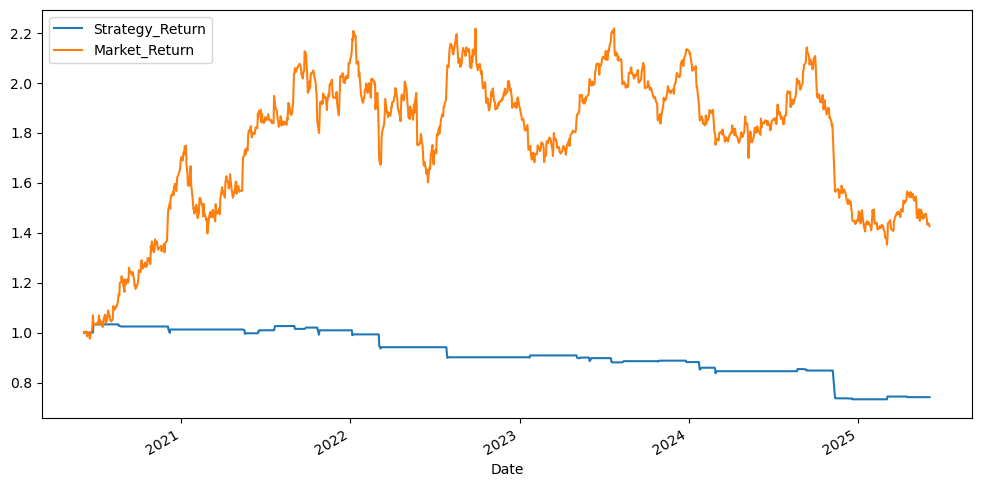

In [122]:
df['Market_Return'] = df['Close'].pct_change()
df['Strategy_Return'] = df['Signal'].shift(1) * df['Market_Return']

(1 + df[['Strategy_Return', 'Market_Return']]).cumprod().plot(figsize=(12,6))


In [123]:
# # Calculate the mean and standard deviation 1 for return and plot it. 
# def return_analysis(data):
#     data['r_mean'] = data['ICICIBANK.NS']['cum_rtn'].rolling(30).mean().plot()
#     data['r_std2+'] = (2* data['ICICIBANK.NS']['cum_rtn'].rolling(30).std() + data['ICICIBANK.NS']['cum_rtn'].rolling(30).mean())
#     data['r_std2-'] = (-2* data['ICICIBANK.NS']['cum_rtn'].rolling(30).std() + data['ICICIBANK.NS']['cum_rtn'].rolling(30).mean())

In [124]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,9))
# for key in tickers:
#     plt.plot(data[key]['Close'], label = key)
# plt.legend()
# plt.show()

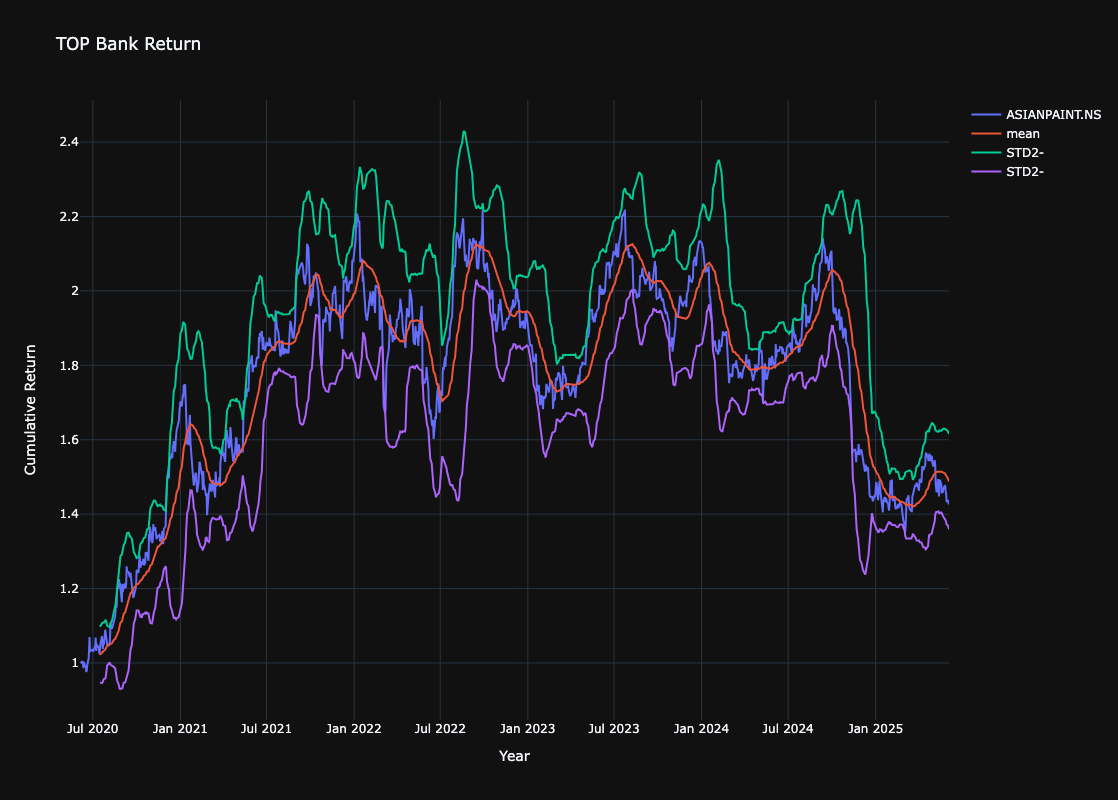

In [125]:
# Create a line chart
import plotly.graph_objects as go
fig = go.Figure()

# Add multiple lines (traces) to the figure
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['cum_rtn'],
        # y1=data[key]['r_mean'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name=key# Use the name for each line from the dictionary
    ))

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        # y=data[key]['cum_rtn'],
        y=data[key]['r_mean'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='mean'# Use the name for each line from the dictionary
    ))

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        # y=data[key]['cum_rtn'],
        y=data[key]['r_std2+'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='STD2-'# Use the name for each line from the dictionary
    ))
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        # y=data[key]['cum_rtn'],
        y=data[key]['r_std2-'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='STD2-'# Use the name for each line from the dictionary
    ))   
# Customize the layout
fig.update_layout(
    title="TOP Bank Return",
    xaxis_title="Year",
    yaxis_title="Cumulative Return",
    autosize=False,
    width=1100,
    height=800,
    template='plotly_dark'
)

# Show the plot
fig.show()